# Deep Learning

## Introduction to Deep Learning
Deep learning is a subset of machine learning, and it uses artificial neural networks to enable machines to learn from data and make predictions or decisions without explicit programming. It has become one of the most popular techniques in machine learning, and it has been applied to a wide range of fields, such as image recognition, natural language processing, and autonomous vehicles.

## Building Blocks of Deep Learning
The building blocks of deep learning are layers, which are the basic units of neural networks. Each layer processes the input data and transforms it into a more abstract representation, which is passed to the next layer. There are several types of layers, such as dense layers, convolutional layers, and recurrent layers, and each has a specific function.

## Look on Neural Network:

A neural network is a type of machine learning algorithm inspired by the structure and function of the human brain. It consists of multiple layers of artificial neurons, which are connected by weights. During training, the weights are adjusted to minimize the error between the predicted output and the actual output.

## Tensor Operations

A tensor is a mathematical object that can represent arrays of data with an arbitrary number of dimensions. Tensor operations are the building blocks of deep learning algorithms, and they include operations such as addition, multiplication, and convolution.

## Coding

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### Loading Dataset

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 7s 1us/step


In [8]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

### Basic Neural Network
our model consists of three layers:

- A Flatten layer that transforms the input images from a 2D array (28x28 pixels) to a 1D array (784 pixels).
- A Dense layer with 128 neurons and ReLU activation function.
- A Dense layer with 10 neurons (one for each possible class) and softmax activation function, which outputs a probability distribution over the classes.

In [9]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### Compiling Model

In [10]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)


### Training and Evaluating Model

In [12]:
# Train the model for 5 epochs with batch size of 32
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2585 - accuracy: 0.9270
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1115 - accuracy: 0.9663
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0760 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0579 - accuracy: 0.9825
Epoch 5/5
313/313 [==============================] - 3s 6ms/step - loss: 0.0832 - accuracy: 0.9748
Test accuracy: 0.9747999906539917


### Classification Report

In [14]:
from sklearn.metrics import classification_report

In [13]:
y_pred = model.predict(x_test)

y_pred_labels = tf.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [16]:
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       1.00      0.97      0.98      1135
           2       0.99      0.96      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.98      0.98       892
           6       0.98      0.97      0.98       958
           7       0.95      0.99      0.97      1028
           8       0.95      0.98      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



### Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

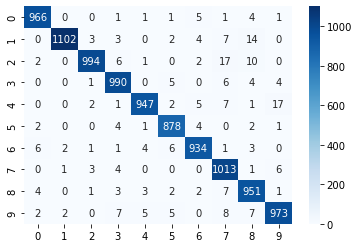

In [19]:
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')